In [1]:
import os
import sys

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
data_dir = os.path.join(project_dir, 'data')
log_dir = os.path.join(project_dir, 'log')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)
import matplotlib.pyplot as plt
import numpy as np

import mech.full_DPSGD as DPSGDModule
from analysis.tradeoff_Gaussian import Gaussian_curve

In [2]:
model_name = 'convnet_balanced'
database_size = 1000
epochs = 20
internal_result_path = "/scratch/bell/wei402/fdp-estimation/results"

data_args = {
    "method": "default",
    "data_dir": data_dir,
    "internal_result_path": os.path.join(internal_result_path, 'train')
}

args = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_KLDivLoss")

estimator_KL = DPSGDModule.DPSGD_PTLREstimator(args)
output = estimator_KL.build(eta_max = 15)
# Extract alpha and beta for plotting
alpha_KLDivLoss = output["alpha"]
beta_KLDivLoss = output["beta"]

Files already downloaded and verified


05/19/2025 18:18:04:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/19/2025 18:18:04:INFO:Found 1000 samples in /scratch/bell/wei402/fdp-estimation/results/train/convnet_balanced_1000_20/samples_folder. Skipping generation.


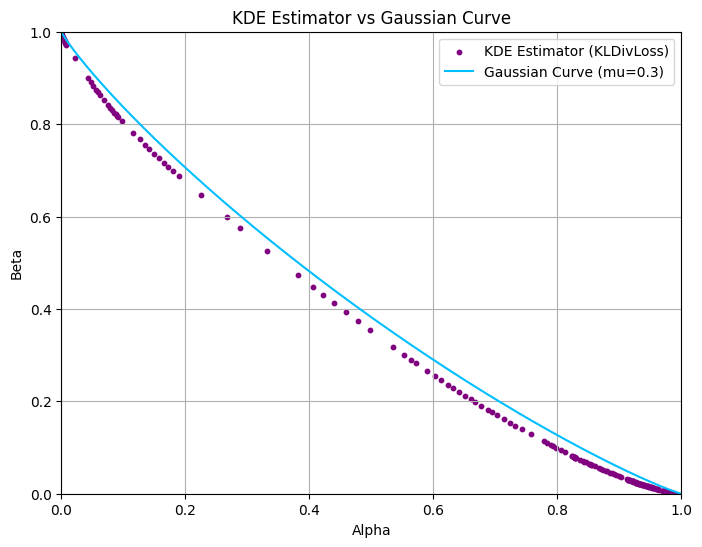

In [3]:
file_name = os.path.join(fig_dir, f"estimation_{model_name}_{database_size}.png")
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(alpha_KLDivLoss, beta_KLDivLoss, color="purple", s=10, label="KDE Estimator (KLDivLoss)")
alpha_values = np.linspace(0, 1, 1000)
plt.plot(alpha_values, Gaussian_curve(alpha_values, mean_difference = 0.3), color="deepskyblue", linewidth=1.5, label="Gaussian Curve (mu=0.3)")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("KDE Estimator vs Gaussian Curve")
plt.legend()
plt.grid()

# Save the plot
plt.savefig(file_name, bbox_inches = 'tight', dpi = 300);
plt.show()